In [52]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import math
import matplotlib.pyplot as plt


In [46]:
from sklearn.datasets import load_digits
digits = load_digits()

sorted_indices = np.argsort(digits.target)
nums = digits.data[sorted_indices]

In [58]:
d = pd.read_csv("mnist_784.csv")

In [68]:
n = d.sort_values("class").drop(["class"], axis=1).to_numpy()

[0.21227549 0.17076165]
[0.38074709 0.19860778]
[0.27802126 0.15993535]
[0.2146344  0.14773962]
[0.2697676  0.14257018]
[0.28629005 0.11736784]
[0.21052996 0.17166942]
[0.26243868 0.1654102 ]
[0.18970776 0.11890553]
[0.23258493 0.1182537 ]


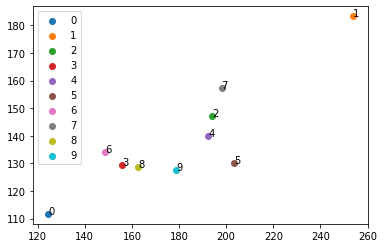

In [73]:
d = pd.DataFrame(nums)

items_per_class = math.floor(len(nums)/10)
x = []
y = []
label = [str(i) for i in range(10)]
for i in range(0, 10):
    pca = PCA(n_components=2)
    start = i*items_per_class
    stop = (i+1)*items_per_class
    X = nums[start:stop]
#     print(digits.target[sorted_indices][start:stop])
    pca.fit(X)
    print(pca.explained_variance_ratio_)
    xc = pca.singular_values_[0]
    yc = pca.singular_values_[1]
    x.append(xc)
    y.append(yc)

for i in range(10):
    plt.scatter(x[i], y[i], label=str(i))
    plt.annotate(str(i), (x[i], y[i]))

plt.legend()

plt.savefig("pca.png", dpi=500, bbox_inches='tight')